## Detecting Silence

As I announced on the last mini-episode, I'm working on a toy project for demonstration purposes building a model that detects who is actively speaking on the podcast.  To make the training process most efficient, I knew I should eliminate silence from the recordings so the algorithm I choose isn't spending a lot of time working on recognizing silence which is spuriously labelled as speech.

Of course, silence is almost never truely silent.  There's always background noise, white noise, errand noises such as coughs or items being set down, and cross talk from another speaker in the same room.  Luckily, I found a simple quick and dirty method that works pretty will for determining if a sample of audio contains speech or silence.

Before I get directly into the technique, let's talk about what a good technique probably does.  On a normalized audio recording of a voice, we can expect moments of speech to peak relatively high and moments of silence to have low maximum amplitude points.  Yet, there's brief moments of silence between words while we speak that help separate them.  We don't want that cut out.

What we truly want is some sort of local average or local maximum that indicates, within a certain window, if we consider the volume high enough to represent active speech vs. silence.  In my, case, I'm going to use average volume within a small window.  Any window with average volume below a given threshold will be labelled as silence.

So how do I pick a good threshold?

Luckily, there's already a popular technique that works pretty well.  It involves finding the root mean square amplitude for a larger sample.  In my case, I'm using the entire file.  This works well because my recordings are mostly homogenous in sound.  I could see a more complicated recording, such as one done outside with a roaming reporter, might require a more complex approach.  I calculate the global root mean square with the formula below:

$rms = \Bigg( \frac{1}{N}\sum\limits_{t=0}^N a_t^2 \Bigg)^\frac{1}{2}$

Where $N$ is the number of samples and $a_t$ is the $t$th amplitude sampled.

The figure below shows the threshold on a waveform of Linh Da speaking.  You can judge for yourself how well it's filtering between speech and silence, but I'm pretty happy with the precision of this easy to calculate result.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.io.wavfile as wav

In [11]:
srcdir = './audio/who-speaking-raw/'
srcs = os.listdir(srcdir)

In [12]:
src = srcs[1]
rate, data = wav.read(srcdir + src)
data = data[0:rate*120]
norm_data = [(ele/2**8.)*2-1 for ele in data]
rms = np.mean(map(lambda x: x**2, data)) ** .5

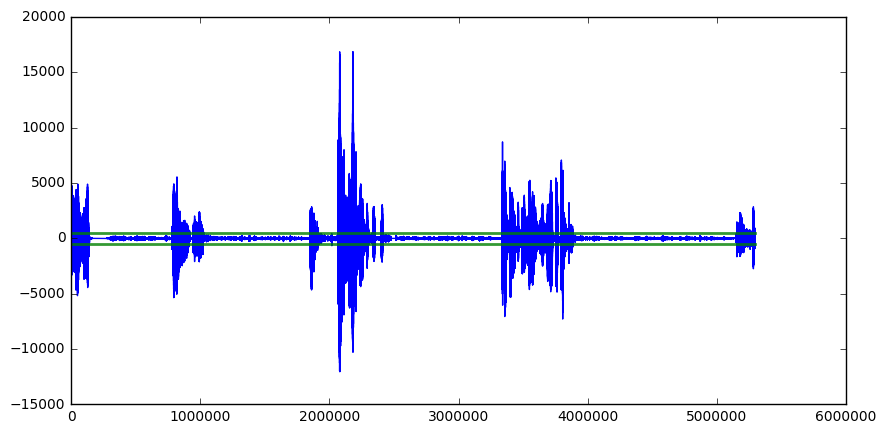

In [39]:
plt.figure(figsize=(10,5))
plt.plot(data, color="blue")
plt.plot([0, len(data)], [rms, rms], color="green", linewidth=2, alpha=.8)
plt.plot([0, len(data)], [-rms, -rms], color="green", linewidth=2, alpha=.8)
plt.show()